

<h1 style="color:#dd3497; background:black; font-weight:bold; text-align:center; padding:10px;">
    Maternal Health Risk Using Machine Learning Techniques
</h1>


<!-- from IPython.display import display, HTML -->

<img src="maternal img.png" width="800">



<h3 style="color:#f768a1; background:black; font-weight:bold; text-align:left; padding:10px;">
    INTRODUCTION
</h3>
Maternal health refers to the health of women during pregnancy, childbirth, and the postpartum period. It encompasses the physical, emotional, and social well-being of mothers before, during, and after delivery.
Maternal health remains a critical component of global public health, particularly in low- and middle-income countries where access to timely and quality care is often limited. Complications during pregnancy and childbirth continue to contribute significantly to morbidity and mortality among women of reproductive age. Early identification of health risks in pregnant women can greatly enhance clinical decision-making, enabling proactive care and improving maternal and neonatal outcomes.

Advancements in data analytics and machine learning have opened new frontiers in healthcare, allowing practitioners to harness existing health data to predict potential risks. By analyzing key physiological parameters, it becomes possible to flag individuals who may be at elevated risk, even before symptoms become critical.

This project leverages basic health indicators—such as age, blood pressure, blood sugar level, body temperature, and heart rate—to classify maternal health risk levels using a simple machine learning classification approach.


<h3 style="color:#f768a1; background:black; font-weight:bold; text-align:left; padding:10px;">
    Problem Statement
</h3>
Despite the availability of basic clinical data, many health systems lack the tools to convert these indicators into actionable insights for timely risk assessment. In most resource-constrained settings, there is a need for lightweight, interpretable models that can assist healthcare providers in classifying maternal risk levels during routine checkups.

Without early identification, high-risk cases may go unnoticed, potentially resulting in adverse health outcomes for both the mother and the child.

<h3 style="color:#f768a1; background:black; font-weight:bold; text-align:left; padding:10px;">
    Objectives
</h3>

1. Perform exploratory data analysis (EDA) to understand distributions, detect outliers, and examine correlations among clinical indicators.

2. Build and compare multiple classification models (e.g., Logistic Regression, Decision Tree, Random Forest) to predict maternal health risk levels.

3.	Evaluate model performance using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

4.	Identify and rank influential features affecting maternal health outcomes using feature importance or model coefficients.




<h3 style="color:#f768a1; background:black; font-weight:bold; text-align:left; padding:10px;">
    Dataset Understanding
</h3>

### Data Source
Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.


### Data Description


| Feature        | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| Age            | Age of the patient in years.                                                 |
| SystolicBP     | Systolic blood pressure, the pressure in arteries when the heart beats.     |
| DiastolicBP    | Diastolic blood pressure, the pressure in arteries when the heart is at rest.|
| BS             | Blood sugar level, typically measured in mmol/L.                            |
| BodyTemp       | Body temperature of the patient, usually in degrees Celsius (°C).           |
| HeartRate      | Heart rate or pulse, measured in beats per minute (bpm).                    |



### Feature Ranges and Interpretations

| Feature        | Low Range                 | Normal Range                      | High Range                          | Notes                                                                 |
|----------------|---------------------------|-----------------------------------|-------------------------------------|-----------------------------------------------------------------------|
| **Age**        | < 20 years                | 20 – 35 years                     | > 35 years                          | Pregnancy risk increases for teens and women over 35.                |
| **SystolicBP** | < 90 mmHg                 | 90 – 120 mmHg                     | > 120 mmHg                          | >140 mmHg may indicate hypertension.                                 |
| **DiastolicBP**| < 60 mmHg                 | 60 – 80 mmHg                      | > 80 mmHg                           | >90 mmHg may indicate high blood pressure.                           |
| **BS**         | < 3.9 mmol/L              | 3.9 – 6.1 mmol/L                  | > 6.1 mmol/L                        | >7.8 mmol/L is typically considered hyperglycemia.                   |
| **BodyTemp**   | < 36°C                    | 36 – 37.5°C                       | > 37.5°C                            | >38°C may indicate fever/infection.                                  |
| **HeartRate**  | < 60 bpm                  | 60 – 100 bpm                      | > 100 bpm                           | Elevated HR may suggest stress, fever, or complications.             |

------------------------------------------------------------------------------------------------------------------------------------------------


<h3 style="color:#f768a1; background:black; font-weight:bold; text-align:left; padding:10px;">
    Data Loading and Inspection
</h3>

In [ ]:
## Importng necessary libraries to read the data
import numpy as np
import pandas as pd

## Reading the dataset
maternal = pd.read_csv("Maternal Health Risk Data Set.csv")
maternal.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [2]:
## summary of data types
maternal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [3]:
#number of rows and cols
maternal.shape

(1014, 7)

------------------------------------------------------------------------------------------------------------------------------------------------

<h3 style="color:#f768a1; background:black; font-weight:bold; text-align:left; padding:10px;">
    Data Vizualuzation
</h3>


<h4 style="color:#fa9fb5; background:black; font-weight:bold; text-align:left; padding:10px;">
Pre Visualization Summary
</h4>


Since the target variable (RiskLevel) is categorical, I will first encode it into a numerical format. This will enable a more effective **correlation analysis**, making it possible to identify which features have the strongest associations with the target. These insights will help guide further data exploration and feature selection.

In [4]:
#count of the target variable.
maternal['RiskLevel'].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [5]:
#converting the categorical col(taget variable) to numerical

#step 1:creating a dataframe
df = pd.DataFrame(maternal)

#step 2:converting the categorical col to numerical
df['RiskLevel_numeric'] = df['RiskLevel'].map({'high risk': 1, 'mid risk': 2,'low risk': 0})

#preview the dataset
df.head(2)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,RiskLevel_numeric
0,25,130,80,15.0,98.0,86,high risk,1
1,35,140,90,13.0,98.0,70,high risk,1


In [6]:

#dropping the categorical col after mapping
df.drop(['RiskLevel'], axis=1, inplace=True)

df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_numeric
0,25,130,80,15.0,98.0,86,1
1,35,140,90,13.0,98.0,70,1
2,29,90,70,8.0,100.0,80,1
3,30,140,85,7.0,98.0,70,1
4,35,120,60,6.1,98.0,76,0


In [7]:
# Showing correlation of all features with the target variable
correlation_with_target = df.corr(numeric_only=True)['RiskLevel_numeric'].sort_values(ascending=False)

# Drop self-correlation (1.0) if you want
correlation_with_target = correlation_with_target.drop('RiskLevel_numeric')

print(correlation_with_target)


SystolicBP     0.186238
BodyTemp       0.149152
BS             0.104971
HeartRate      0.082852
DiastolicBP    0.070440
Age            0.061150
Name: RiskLevel_numeric, dtype: float64


By leveraging correlation analysis, I have identified the features that exhibit a strong relationship with the target variable. This has streamlined the process of selecting relevant variables for visualization, enabling more focused and insightful data exploration.

<h4 style="color:#fa9fb5; background:black; font-weight:bold; text-align:left; padding:10px;">
Univariate Analysis
</h4>

Checking the disribution of each feature uderstand its characteristic

### `Distribution of the target variable`

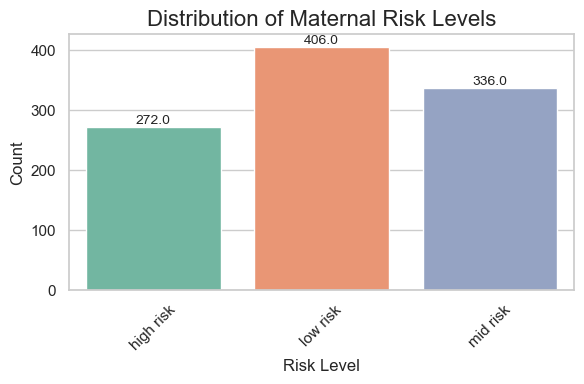

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # This will ignore all warnings

sns.set(style="whitegrid")

# Plot value counts of RiskLevel
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=maternal, x='RiskLevel', hue='RiskLevel',
                   palette='Set2', legend=False)

# Add labels and title
plt.title('Distribution of Maternal Risk Levels', fontsize=16)
plt.xlabel('Risk Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom',
                fontsize=10)

plt.tight_layout()
plt.show()


### `Distribution of the other features`

Since my dataset has few features,I will use a histogram to show the distribution of each feature.

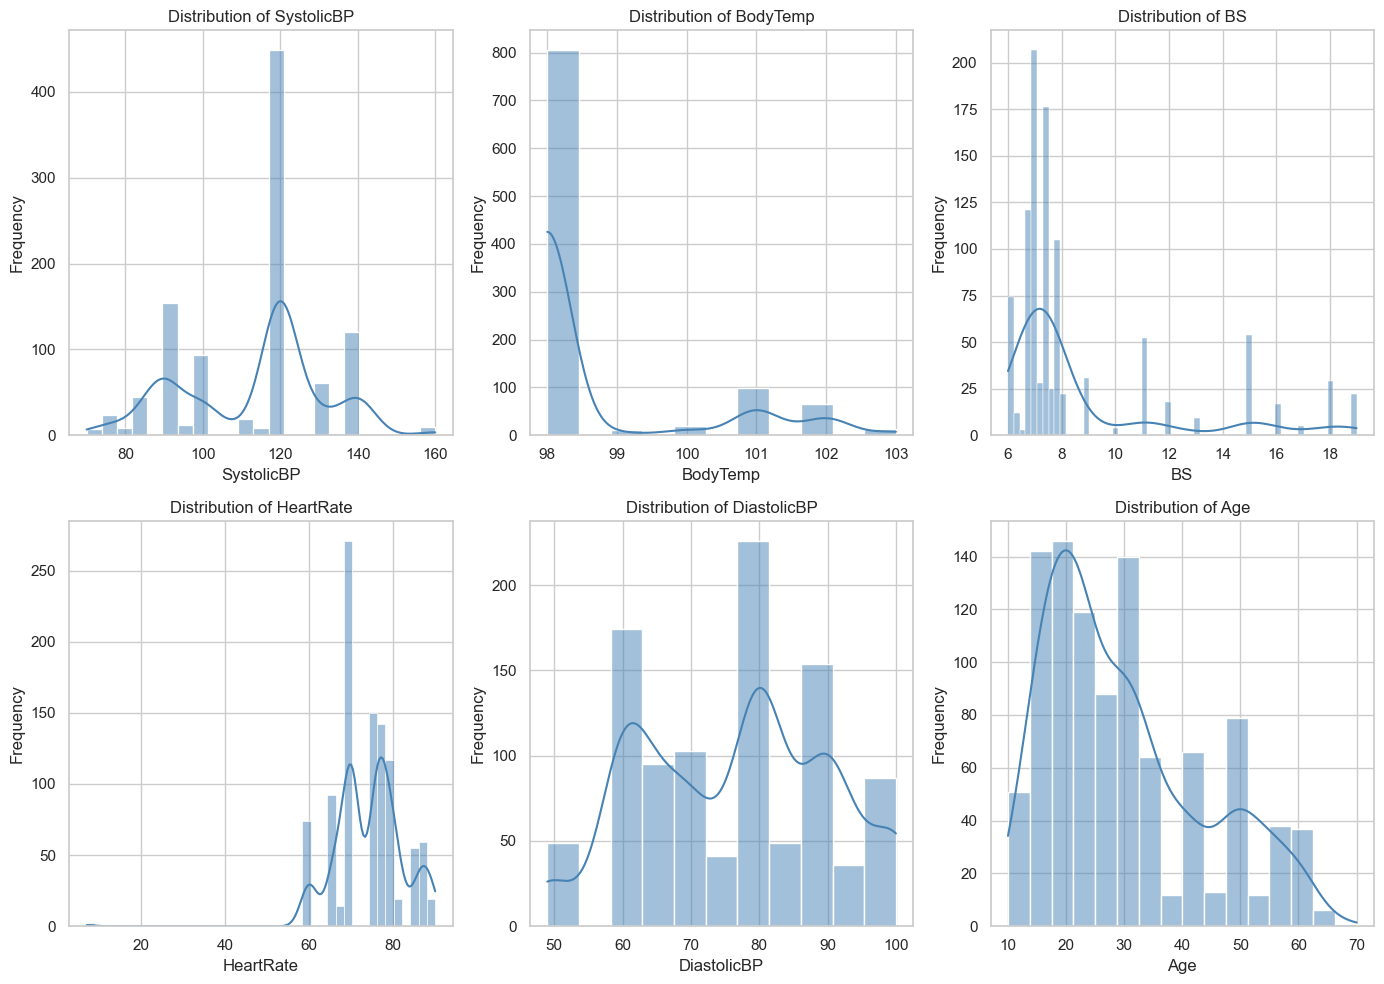

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns
columns = ['SystolicBP', 'BodyTemp', 'BS','HeartRate','DiastolicBP','Age']

# Set style
sns.set_style("whitegrid")

# Create subplots
plt.figure(figsize=(14, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.histplot(data=maternal, x=col, kde=True, color='steelblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Observation made from Univarate analysis

1. Systolic Blood Pressure (SystolicBP)
The distribution is multimodal with a dominant peak around 120 mmHg, suggesting a concentration around the normal systolic level. However, there are noticeable frequencies at higher values, indicating possible hypertensive cases.

2. Diastolic Blood Pressure (DiastolicBP)
The distribution is somewhat bimodal, with peaks around 65–70 mmHg and 80–90 mmHg. This may reflect different blood pressure profiles within the population—possibly normal and prehypertensive/hypertensive individuals.

3. Body Temperature (BodyTemp) Strong right-skewed distribution with a sharp peak near 98°F (normal body temperature). Elevated body temperatures are present but less common, possibly indicating fever in a few cases.

4. Blood Sugar (BS)
Right-skewed distribution with most values clustered between 6–9 mmol/L. The presence of extremely high values (up to 19) suggests some cases of hyperglycemia, a risk factor for gestational diabetes.

5. Heart Rate
Normal distribution centered around 70 bpm, with a minor drop on either end. Values below 60 bpm are also common, possibly indicating bradycardia or healthy resting rates in some individuals.

6. Age
Left-skewed distribution with the majority of individuals between 20–30 years. Fewer cases exist in older age brackets, but the extended tail toward 70 suggests some pregnancies occur at advanced maternal ages.

<h4 style="color:#fa9fb5; background:black; font-weight:bold; text-align:left; padding:10px;">
Bivariate Analysis
</h4>

After exploring the distribution of individual features in the univariate analysis, the next step is to understand how each feature relates to the target variable, RiskLevel. In this bivariate analysis, I will investigate **features with the highest correlation to the target variable** to identify patterns, trends, and potential predictive connections between the input features and the risk category. By doing so, we can gain deeper insights into the data and understand which features play a more significant role in differentiating between risk levels.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def bivariate_analysis(df, feature, target='RiskLevel'):
    """
    Plots the relationship between a feature and the target variable.
    If the feature is numeric, it uses a boxplot.
    If it's categorical, it uses a countplot.

    Parameters:
    df (pd.DataFrame): The dataset.
    feature (str): The column name of the feature.
    target (str): The column name of the target variable (default is 'RiskLevel').
    """
    plt.figure(figsize=(8, 5))
    if pd.api.types.is_numeric_dtype(df[feature]):
        sns.boxplot(data=df, x=target, y=feature, palette='Set2')
        plt.title(f'Distribution of {feature} across {target} Categories', fontsize=14)
        plt.xlabel(target)
        plt.ylabel(feature)
    else:
        sns.countplot(data=df, x=feature, hue=target, palette='Set2')
        plt.title(f'{feature} vs {target}', fontsize=14)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


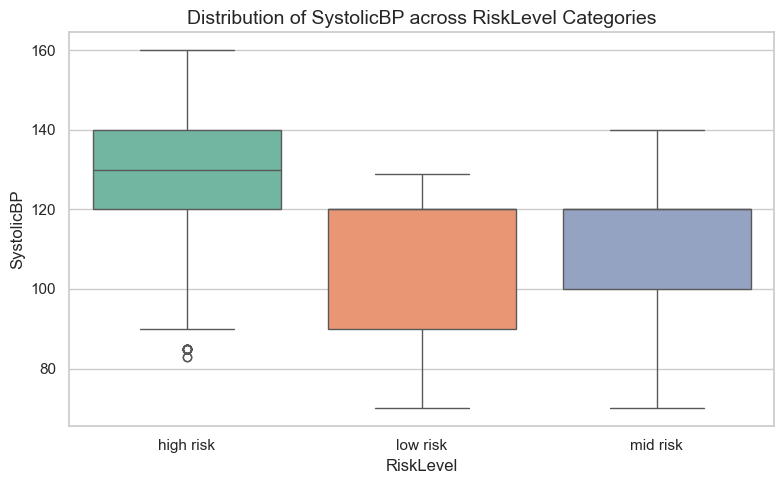

In [11]:
bivariate_analysis(maternal, 'SystolicBP')

- There's a clear upward trend in median and IQR of SystolicBP as the risk level increases.

- High blood pressure (especially >130 mmHg) appears to be strongly associated with increased maternal health risk.

- This chart provides evidence that SystolicBP is a valuable predictive feature for classifying maternal health risk levels.

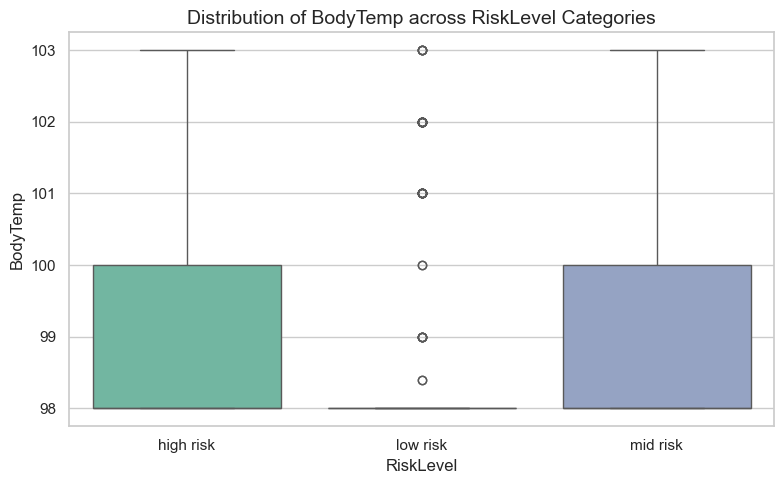

In [13]:
bivariate_analysis(maternal, 'BodyTemp')

- Body temperature is mostly stable across all groups, with most values around the normal range (~98°F).

- Elevated temperatures (outliers >100°F) are observed in all categories, but more so in high and mid risk groups.

- This suggests that BodyTemp may have limited discriminative power alone, but could be useful when combined with other features like blood pressure or heart rate.

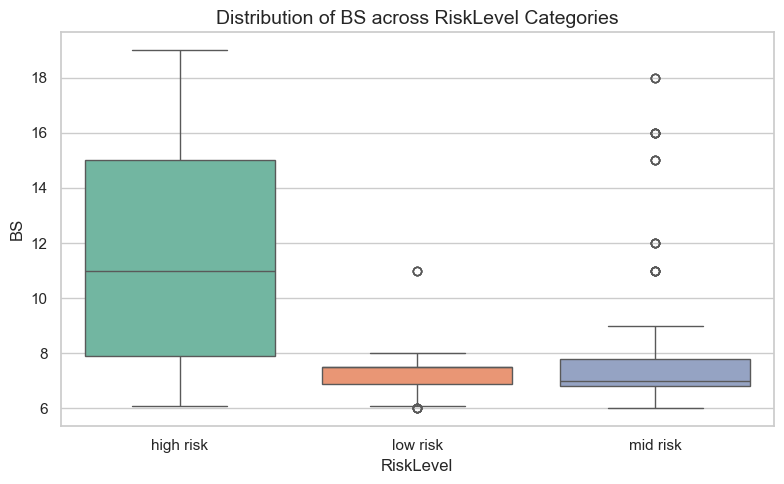

In [14]:
bivariate_analysis(maternal, 'BS')

Blood sugar level is a strong differentiator of maternal health risk. High BS is clearly associated with the high-risk group, supporting its potential importance in risk prediction models.

--------------------------------------------------------------------------------------------------------------------------------------------------


<h3 style="color:#f768a1; background:black; font-weight:bold; text-align:left; padding:10px;">
    Modeling
</h3>

This will involve Using algorithms to learn patterns from data in order to make predictions or classifications on new, unseen data

In [15]:
#importing necessary libraries for modeling

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# # Load dataset

# Split features and target
X = df.drop("RiskLevel_numeric", axis=1)
y = df["RiskLevel_numeric"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Results of the test data")
print(X_test.shape)

print(y_test.shape)
print(f"Results of the train data")
print(X_train.shape)

print(y_train.shape)


Results of the test data
(203, 6)
(203,)
Results of the train data
(811, 6)
(811,)


<h4 style="color:#fa9fb5; background:black; font-weight:bold; text-align:left; padding:10px;">
Model Selection
</h4>

### 1. `Logistic Regression`

=== Logistic Regression ===
Accuracy: 0.625615763546798
[[71  1  8]
 [11 34  2]
 [47  7 22]]
              precision    recall  f1-score   support

           0       0.55      0.89      0.68        80
           1       0.81      0.72      0.76        47
           2       0.69      0.29      0.41        76

    accuracy                           0.63       203
   macro avg       0.68      0.63      0.62       203
weighted avg       0.66      0.63      0.60       203



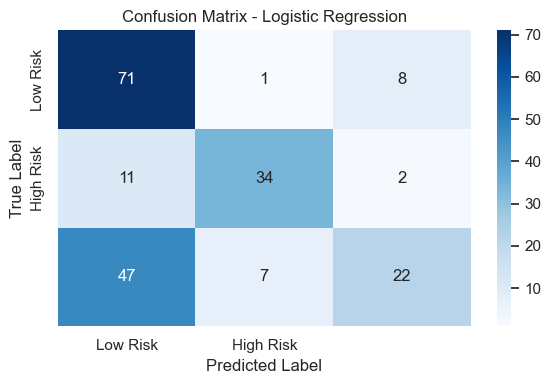

In [17]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluation
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



### 2. `Decison Tree Algorithm`

=== Decision Tree ===
Accuracy: 0.8177339901477833
[[62  5 13]
 [ 1 40  6]
 [ 9  3 64]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        80
           1       0.83      0.85      0.84        47
           2       0.77      0.84      0.81        76

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203



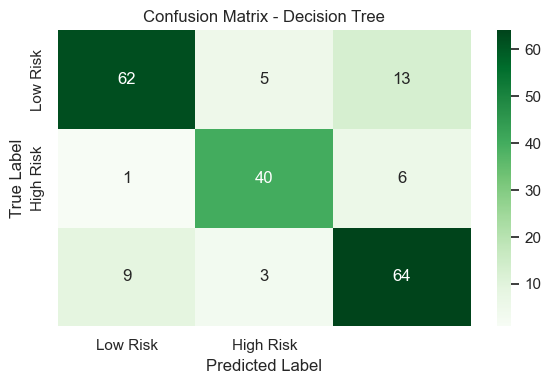

In [18]:
# Decision Tree Model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predictions
y_pred_tree = dtree.predict(X_test)

# Evaluation
print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Compute confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Plot using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


### 3. `Random Forest Classifier`


=== Random Forest ===
Accuracy: 0.812807881773399
[[61  3 16]
 [ 1 40  6]
 [ 9  3 64]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        80
           1       0.87      0.85      0.86        47
           2       0.74      0.84      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203



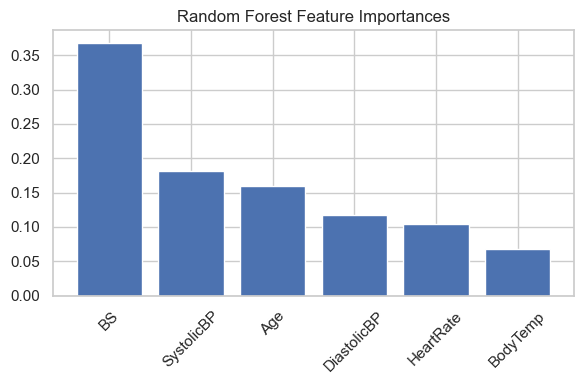

Random forest confusion matrix


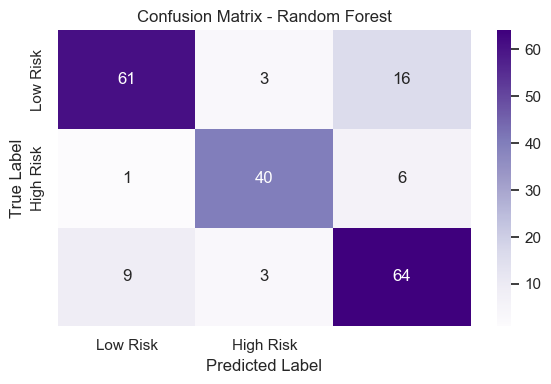

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# === Random Forest ===
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# === Random Forest Feature Importance Plot ===
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(6,4))
plt.title("Random Forest Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.tight_layout()
plt.show()


print(f"Random forest confusion matrix")
# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



| Criterion                                | **Recommended Model**               | Reason for selection                                                           |
| ---------------------------------------- | ----------------------------------- | --------------------------------------------------------------- |
| Best Overall Accuracy                    |  **Decision Tree**                 | Slightly outperforms Random forest (81.8% vs 81.3%)                        |
| Best Class 2 Recall (High Risk patients) |  **Decision Tree & Random Forest** | Both achieved **0.84 recall**, much better than Logostic Regession (0.29)       |
| Best F1-Score (Mid Risk)                 |  **Random Forest**                 | F1 of **0.86** for Mid Risk                                     |
| Most Balanced Performance                |  **Decision Tree**                 | Strong performance across all classes, simple and interpretable |


The Decision Tree model demonstrated strong overall accuracy (81.8%), high recall for high-risk cases, and balanced performance across all classes, while also being simple and interpretable.

------------------------------------------------------------------------------------------------------------------------------------------


<h3 style="color:#f768a1; background:black; font-weight:bold; text-align:left; padding:10px;">
    Conclusions
</h3>

Model Performance:
The machine learning model was successfully able to classify maternal risk into low, mid, and high categories using easily measurable clinical data. This demonstrates the potential for ML-based decision support in maternal care.

Key Predictors:
Variables such as SystolicBP, HeartRate, and Body Temperature were significant contributors in determining maternal health risk. These can be prioritized in routine health assessments.

Model Usability:
The use of simple, interpretable models (e.g., Decision Tree, Logistic Regression) makes it feasible to deploy such tools in low-resource healthcare settings without needing advanced computing infrastructure.

<h3 style="color:#f768a1; background:black; font-weight:bold; text-align:left; padding:10px;">
    Recomendations
</h3>

Training for Healthcare Workers:
Train local health practitioners on interpreting model predictions to strengthen human-machine collaboration in maternal care.

Continuous Data Collection:
Encourage more IoT-based data collection from rural and urban clinics to continuously update and retrain the model for greater accuracy and generalizability.

Expand Feature Set:
Future iterations can include additional features such as hemoglobin levels, prenatal history, or socioeconomic data to improve model precision.

Patient Education:
Use the model’s results to counsel at-risk mothers on lifestyle changes and follow-up actions, strengthening preventive care.

-------------------------------------------------------------------------------------------------------------------------------------